<a href="https://colab.research.google.com/github/TeddyFirman/scrape-images/blob/main/Food_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/My Drive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [4]:
# First we need to create the Image Augmentation
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip='True')
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
training_set = training_datagen.flow_from_directory('dataset/train', batch_size=60, target_size=(64,64), class_mode='categorical')
test_set = test_datagen.flow_from_directory('dataset/test',batch_size=60, target_size=(64,64),class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [7]:
model = tf.keras.Sequential()
# 1st layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), input_shape=[64,64,3], activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
# 2nd layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
# flatten
model.add(tf.keras.layers.Flatten())
# neural network
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dense(units=521, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                    

In [8]:
#compling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=training_set,validation_data=test_set,epochs=10)


Epoch 1/10
182/182 [==============================] - 89s 424ms/step - loss: 0.2064 - accuracy: 0.7309 - val_loss: 0.1162 - val_accuracy: 0.8610
Epoch 2/10
182/182 [==============================] - 71s 389ms/step - loss: 0.1029 - accuracy: 0.8788 - val_loss: 0.0795 - val_accuracy: 0.9062
Epoch 3/10
182/182 [==============================] - 70s 386ms/step - loss: 0.0819 - accuracy: 0.9065 - val_loss: 0.0455 - val_accuracy: 0.9470
Epoch 4/10
182/182 [==============================] - 71s 392ms/step - loss: 0.0622 - accuracy: 0.9297 - val_loss: 0.0490 - val_accuracy: 0.9437
Epoch 5/10
182/182 [==============================] - 71s 391ms/step - loss: 0.0598 - accuracy: 0.9336 - val_loss: 0.0377 - val_accuracy: 0.9655
Epoch 6/10
182/182 [==============================] - 71s 391ms/step - loss: 0.0491 - accuracy: 0.9457 - val_loss: 0.0339 - val_accuracy: 0.9640
Epoch 7/10
182/182 [==============================] - 71s 390ms/step - loss: 0.0413 - accuracy: 0.9543 - val_loss: 0.0309 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


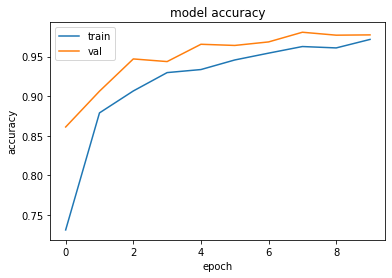

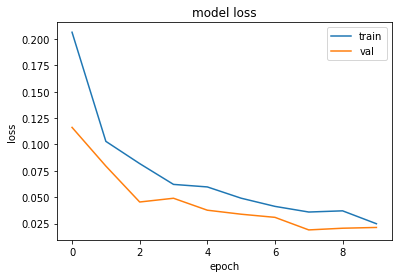

In [9]:
# ploting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='bottom right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [10]:
#save model
model.save('Uji_Coba_Teddy.h5')
model_json = model.to_json()
with open("Uji_Coba_Teddy.json", "w") as json_file:
    json_file.write(model_json)
print("Saved")

Saved


In [ ]:
import numpy as np
from keras.preprocessing import image
np.loadtxt
classes = ['Fresh Apple','Fresh Banana','Fresh Orange','Rotten Apple','Rotten Banana','Rotten Orange']#creating the class labels
test_image = image.load_img('tes_coba/', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.argmax(result))
result=result[0]
for i in range(6):
    if result[i] == 1.:
        break;
prediction = classes[i]
print(prediction)

In [11]:
#Saving in array #bypass 
import numpy as np
labels=training_datagen.flow_from_directory('/content/dataset/train')
Demo_labels=labels.class_indices
print(Demo_labels)
print("Dict data is converted to array")
#converting dict to array
data = list(dict. items(Demo_labels))
an_array = np. array(data)
print(an_array)
np.save('Fruits_labels',an_array)
#saving in array form 

Found 10901 images belonging to 6 classes.
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Dict data is converted to array
[['freshapples' '0']
 ['freshbanana' '1']
 ['freshoranges' '2']
 ['rottenapples' '3']
 ['rottenbanana' '4']
 ['rottenoranges' '5']]


In [ ]:
#prediction from array #bypass
label_data=np.load('/content/Fruits_labels.npy')
test_image = image.load_img('/content/apple.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result1=result[0]
for i in range(6):
  if result1[i] == 1.:
    break;
prediction = label_data[i][0]
print(prediction) 